In [13]:
import pandas as pd # Load the file to inspect its structure
df = pd.read_csv('X_full_dataset.csv', encoding="utf-8-sig")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31624 entries, 0 to 31623
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       31624 non-null  int64 
 1   followers     31624 non-null  int64 
 2   following     31624 non-null  int64 
 3   user_id       31624 non-null  int64 
 4   verified      31624 non-null  bool  
 5   full_text     31624 non-null  object
 6   created_At    31624 non-null  object
 7   created_at    31624 non-null  object
 8   lang          31624 non-null  object
 9   repost_count  31624 non-null  int64 
 10  like_count    31624 non-null  int64 
 11  source        31624 non-null  object
dtypes: bool(1), int64(6), object(5)
memory usage: 2.7+ MB


,post_id,followers,following,user_id,verified,full_text,created_At,created_at,lang,repost_count,like_count,source
0,1907578844636393679,59,12,1810361594586738692,True,"This is nasty \n\nNASDAQ futures down -4.4%, S...",Wed Apr 02 23:40:12 +0000 2025,02/04/2025,en,0,0,Twitter Web App
1,1907578044492968060,92590,31,2736639061,False,Investors Panic as U.S. Stock Market Plummets ...,Wed Apr 02 23:37:01 +0000 2025,02/04/2025,en,1,0,Twitter Web App
2,1907575218501198232,261,180,1850383929829945344,False,For all the people who have absolutely no conc...,Wed Apr 02 23:25:47 +0000 2025,02/04/2025,en,0,2,Twitter for Android
3,1907574739964510255,156,1827,449290925,False,As someone who is feeling JVL levels of schade...,Wed Apr 02 23:23:53 +0000 2025,02/04/2025,en,0,0,Twitter for Android
4,1907570533836701721,845,1632,23709151,False,The fuzziest math is #TrumpTariff Math.,Wed Apr 02 23:14:59 +0000 2025,02/04/2025,en,0,0,Twitter for Android


In [24]:
# Data cleaning (1)
import math

# Copy dataset for cleaning
df_clean = df.copy()

# Step 1: Keep only English posts
before = len(df_clean)
df_clean = df_clean[df_clean['lang'].astype(str).str.lower() == 'en'].copy()

print("Total posts before english language filtered:", before)
print("Total posts after english language filtered:", len(df_clean))

Total posts before english language filtered: 31624
Total posts after english language filtered: 31596


Total users: 19743
Top 1% users: 197
Cutoff frequency (posts per user): 8


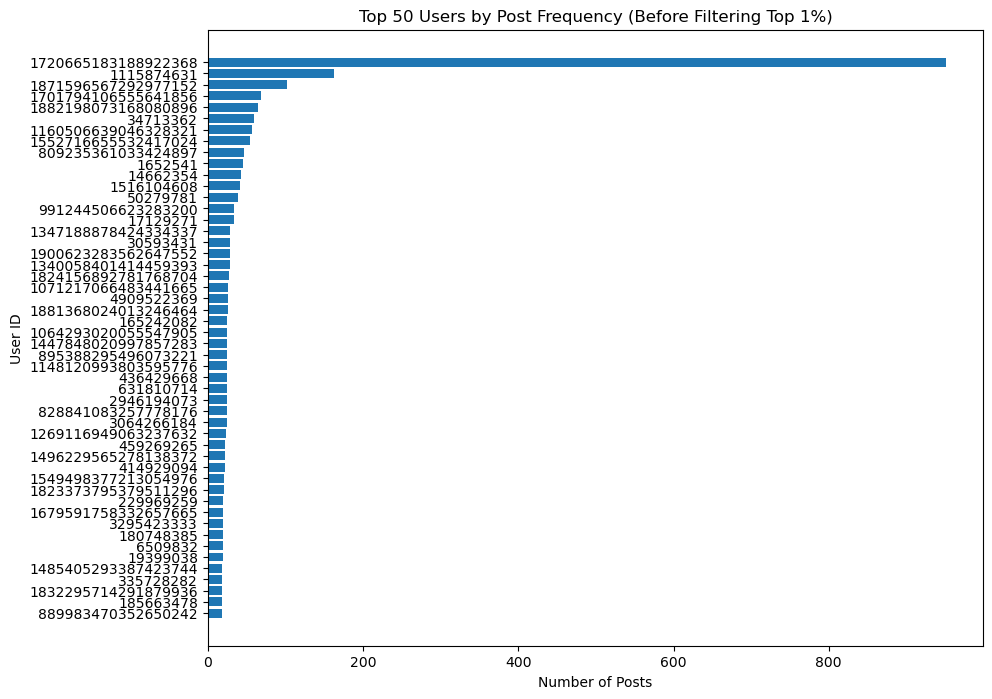

In [25]:
# Data cleaning (2)
import matplotlib.pyplot as plt

# Step 2: Remove top 1% high-activity User ID (1)

user_post_counts = df_clean['user_id'].value_counts()

# number of users
total_users = user_post_counts.shape[0]

# top 1% user count
top_n = int(total_users * 0.01)

# cutoff = frequency of the Nth user
cutoff = user_post_counts.iloc[top_n - 1]

print("Total users:", total_users)
print("Top 1% users:", top_n)
print("Cutoff frequency (posts per user):", cutoff)

# Bar chart to illustrate post frequency per users
user_post_counts = user_post_counts.sort_values(ascending=False) # Sort by frequency 

top_n = 50  #top 50 users who have the highest post frequency
plt.figure(figsize=(10,8))
plt.barh(user_post_counts.index[:top_n].astype(str), user_post_counts.values[:top_n])
plt.title(f"Top {top_n} Users by Post Frequency (Before Filtering Top 1%)")
plt.xlabel("Number of Posts")
plt.ylabel("User ID")
plt.gca().invert_yaxis()  # sorting highest on top
plt.show()

In [26]:
# Data cleaning (3)

# Step 2: Remove top 1% high-activity User ID (2)
less_than_8 = (user_post_counts < 8).sum() # Users with fewer than 8 posts
greater_equal_8 = (user_post_counts >= 8).sum() # Users with 8 or more posts

print("Users with < 8 posts:", less_than_8)
print("Users with ≥ 8 posts:", greater_equal_8)
print("Total users:", user_post_counts.shape[0])

Users with < 8 posts: 19506
Users with ≥ 8 posts: 237
Total users: 19743


In [27]:
# Data cleaning (4)

# Step 2: Remove top 1% high-activity User ID (3)
top_users = user_post_counts.head(237).index # Select top 237 user_ids

# Remove all posts from these users
before = len(df_clean)
df_clean = df_clean[~df_clean['user_id'].isin(top_users)]
after = len(df_clean)

print(f"Posts before removing top 1% high-activity user (237): {before}")
print(f"Posts after removing top 1% high-activity user (237) {after}")
print(f"Removed: {before - after} posts")
print(f"Remaining users: {df_clean['user_id'].nunique()}")

Posts before removing top 1% high-activity user (237): 31596
Posts after removing top 1% high-activity user (237) 27008
Removed: 4588 posts
Remaining users: 19506


In [28]:
# Data cleaning (5)

# Step 3: Remove duplicate posts (keep unique ones)

before = len(df_clean)

# Drop duplicate posts based on user_id + full_text
df_clean = df_clean.drop_duplicates(subset=['user_id', 'full_text'], keep='first')

after = len(df_clean)

print(f"Posts before removing duplicates: {before}")
print(f"Posts after removing duplicates: {after}")
print(f"Removed: {before - after} duplicate posts")

Posts before removing duplicates: 27008
Posts after removing duplicates: 24967
Removed: 2041 duplicate posts


In [29]:
# Data cleaning (6)

# Step 4: Keep only official Twitter/X clients
valid_sources = [
    "Twitter for iPhone",
    "Twitter for Android",
    "Twitter for iPad",
    "Twitter Web App",
    "Twitter for Mac",
    "Twitter Web Client"
]

before = len(df_clean)
df_clean = df_clean[df_clean['source'].isin(valid_sources)]
after = len(df_clean)

print(f"Posts before source filtering: {before}")
print(f"Posts after source filtering: {after}")
print(f"Removed: {before - after} posts")
print(f"Remaining unique users: {df_clean['user_id'].nunique()}")

Posts before source filtering: 24967
Posts after source filtering: 22392
Removed: 2575 posts
Remaining unique users: 17941


In [30]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 22392 entries, 0 to 31623
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       22392 non-null  int64 
 1   followers     22392 non-null  int64 
 2   following     22392 non-null  int64 
 3   user_id       22392 non-null  int64 
 4   verified      22392 non-null  bool  
 5   full_text     22392 non-null  object
 6   created_At    22392 non-null  object
 7   created_at    22392 non-null  object
 8   lang          22392 non-null  object
 9   repost_count  22392 non-null  int64 
 10  like_count    22392 non-null  int64 
 11  source        22392 non-null  object
dtypes: bool(1), int64(6), object(5)
memory usage: 2.1+ MB


,post_id,followers,following,user_id,verified,full_text,created_At,created_at,lang,repost_count,like_count,source
0,1907578844636393679,59,12,1810361594586738692,True,"This is nasty \n\nNASDAQ futures down -4.4%, S...",Wed Apr 02 23:40:12 +0000 2025,02/04/2025,en,0,0,Twitter Web App
1,1907578044492968060,92590,31,2736639061,False,Investors Panic as U.S. Stock Market Plummets ...,Wed Apr 02 23:37:01 +0000 2025,02/04/2025,en,1,0,Twitter Web App
2,1907575218501198232,261,180,1850383929829945344,False,For all the people who have absolutely no conc...,Wed Apr 02 23:25:47 +0000 2025,02/04/2025,en,0,2,Twitter for Android
3,1907574739964510255,156,1827,449290925,False,As someone who is feeling JVL levels of schade...,Wed Apr 02 23:23:53 +0000 2025,02/04/2025,en,0,0,Twitter for Android
4,1907570533836701721,845,1632,23709151,False,The fuzziest math is #TrumpTariff Math.,Wed Apr 02 23:14:59 +0000 2025,02/04/2025,en,0,0,Twitter for Android


In [34]:
# Seperating cleaned dataset into structured tables (1)

# Create Posts table
posts_table = df_clean[[
    'post_id', 'user_id', 'full_text', 'created_At',
    'lang', 'repost_count', 'like_count', 'source'
]].drop_duplicates(subset=['post_id'])
posts_table

posts_table.to_csv("posts_table.csv", index=False) # Save Posts table as CSV

In [32]:
# Seperating cleaned dataset into structured tables (2)

# Create Users table
users_table = df_clean[[
    'user_id', 'followers', 'following', 'verified'
]].drop_duplicates(subset=['user_id'])
users_table

users_table.to_csv("users_table.csv", index=False) # Save Users table as CSV

In [33]:
# Seperating cleaned dataset into structured tables (3)

import re

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

# Expand hashtags into separate rows
hashtags_table = (
    df_clean[['post_id', 'full_text']]
    .assign(hashtags=df_clean['full_text'].apply(extract_hashtags))
    .explode('hashtags')
    .dropna(subset=['hashtags'])
    .rename(columns={'hashtags': 'hashtag'})[['post_id', 'hashtag']]
)
hashtags_table

hashtags_table.to_csv("hashtags_table.csv", index=False) # Save Hashtags table as CSV